In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
data=pd.read_csv('atm bank dataset.csv')

In [ ]:
data.head()

,Unnamed: 0,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [ ]:
data.describe()

,Unnamed: 0,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
count,2244.000000,2244.000000,2244.000000,2244.000000,2.244000e+03,2.244000e+03
mean,5706.037433,3.557932,6.313280,2013.710784,5.150901e+05,5.157175e+05
std,3348.296502,1.760703,3.257336,1.920082,1.935272e+05,2.551791e+05
min,11.000000,1.000000,1.000000,2011.000000,1.800000e+03,1.000000e+02
25%,2816.750000,2.000000,4.000000,2012.000000,4.197290e+05,3.494750e+05
50%,5664.500000,4.000000,6.000000,2014.000000,5.403860e+05,5.141000e+05
75%,8447.250000,5.000000,9.000000,2015.000000,6.378000e+05,6.849250e+05
max,11585.000000,7.000000,12.000000,2017.000000,1.006829e+06,1.410700e+06


In [ ]:
data.drop(['atm_name'],inplace=True,axis=1)

In [ ]:
data.head()

,Unnamed: 0,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [ ]:
data.isnull().sum()

Unnamed: 0                0
weekday                   0
festival_religion         0
working_day               0
holiday_sequence          0
trans_date_set            0
trans_month               0
trans_year                0
prevweek_mean             0
total_amount_withdrawn    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


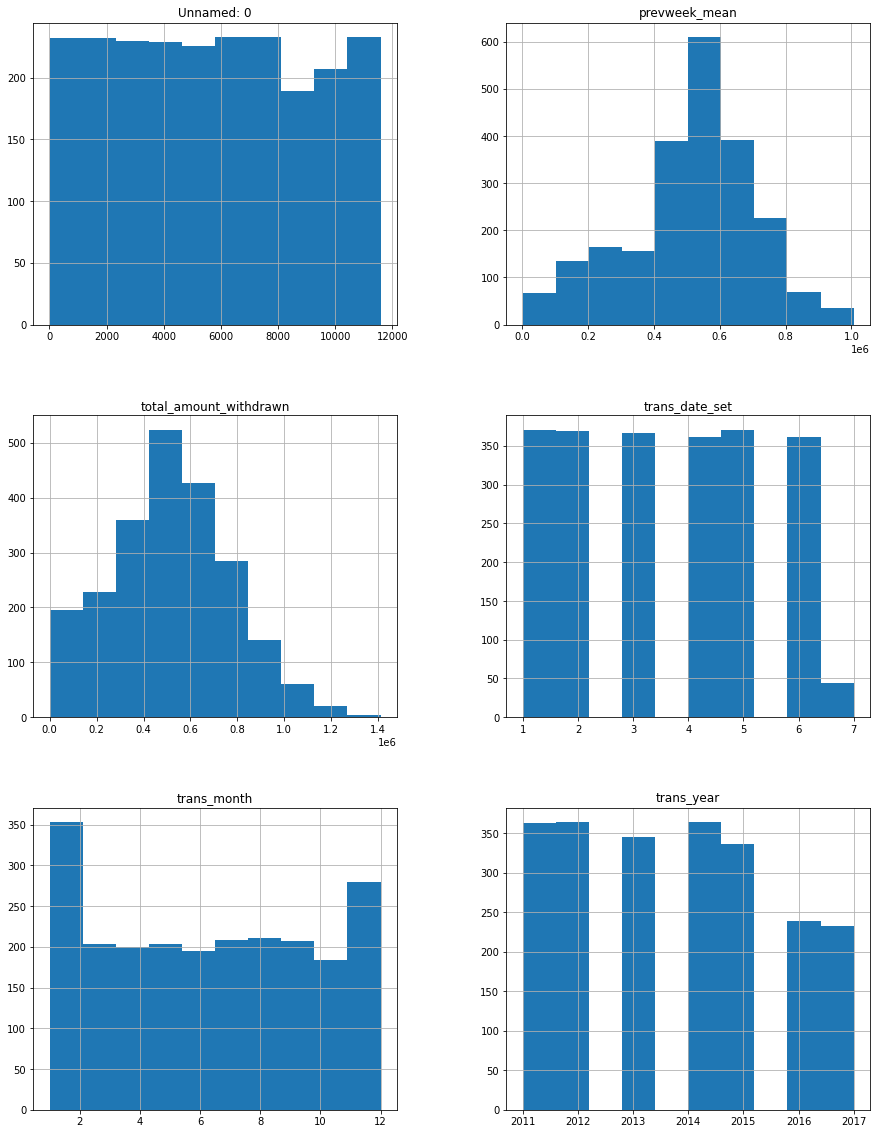

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

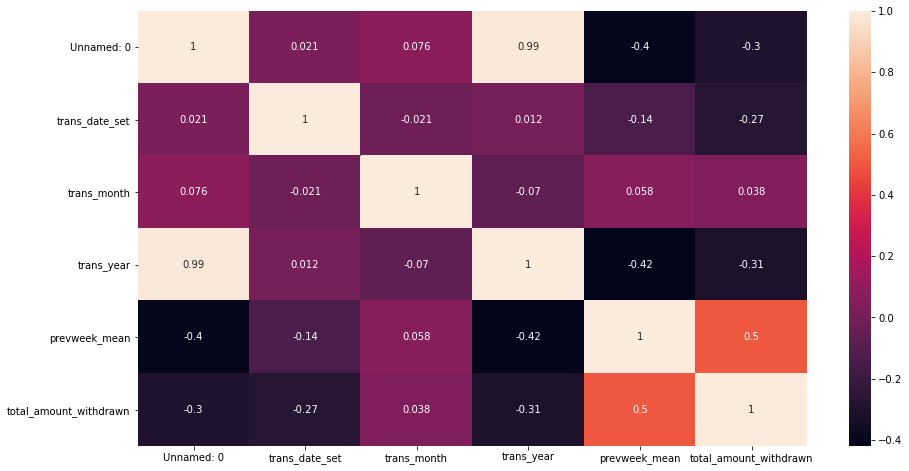

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

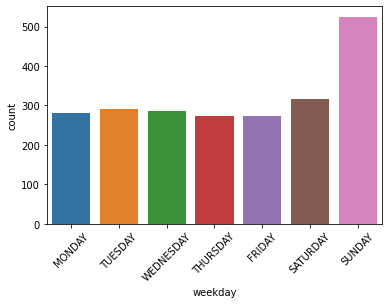

In [ ]:
sns.countplot(x='weekday', data=data)
plt.xticks(rotation=45)

In [ ]:
data['working_day'] = data['working_day'].map({'W': 1, 'H': 0})

In [ ]:
data.head()

,Unnamed: 0,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,MONDAY,NH,1,WWW,1,1,2011,648600,897100
1,16,TUESDAY,NH,1,WWW,1,1,2011,648600,826000
2,21,WEDNESDAY,NH,1,WWW,1,1,2011,648600,754400
3,26,THURSDAY,NH,1,WWW,2,1,2011,648600,834200
4,31,FRIDAY,NH,1,WWW,2,1,2011,648600,575300


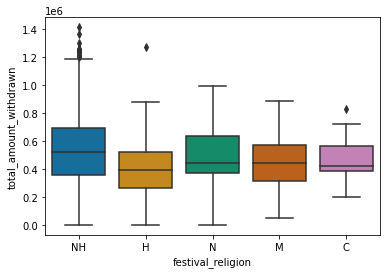

In [ ]:
sns.boxplot(y='total_amount_withdrawn', x='festival_religion', data=data, palette="colorblind")

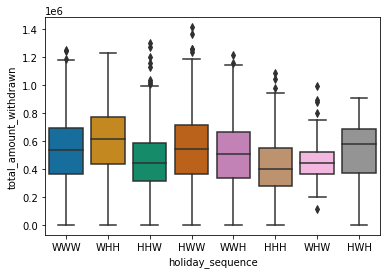

In [ ]:
sns.boxplot(y='total_amount_withdrawn', x='holiday_sequence', data=data, palette="colorblind")

In [ ]:
numerical=data[['Unnamed: 0','trans_date_set','trans_month','trans_year' ,'prevweek_mean' ,'total_amount_withdrawn']]
categories=data[['weekday' ,'festival_religion','working_day' ,'holiday_sequence']]
print(numerical)

      Unnamed: 0  trans_date_set  ...  prevweek_mean  total_amount_withdrawn
0             11               1  ...         648600                  897100
1             16               1  ...         648600                  826000
2             21               1  ...         648600                  754400
3             26               2  ...         648600                  834200
4             31               2  ...         648600                  575300
...          ...             ...  ...            ...                     ...
2239       11565               5  ...         276058                  447400
2240       11570               6  ...         276058                  153800
2241       11575               6  ...         276058                  167100
2242       11580               6  ...         276058                  317400
2243       11585               6  ...         276058                  305100

[2244 rows x 6 columns]


In [ ]:
categories = pd.get_dummies(categories,drop_first=True)

In [ ]:
df=pd.concat([numerical, categories], axis = 1)

In [ ]:
df.describe()

,Unnamed: 0,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn,working_day,weekday_MONDAY,weekday_SATURDAY,weekday_SUNDAY,weekday_THURSDAY,weekday_TUESDAY,weekday_WEDNESDAY,festival_religion_H,festival_religion_M,festival_religion_N,festival_religion_NH,holiday_sequence_HHW,holiday_sequence_HWH,holiday_sequence_HWW,holiday_sequence_WHH,holiday_sequence_WHW,holiday_sequence_WWH,holiday_sequence_WWW
count,2244.000000,2244.000000,2244.000000,2244.000000,2.244000e+03,2.244000e+03,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.00000,2244.000000,2244.00000
mean,5706.037433,3.557932,6.313280,2013.710784,5.150901e+05,5.157175e+05,0.570856,0.125223,0.140374,0.233957,0.121658,0.129679,0.127897,0.031194,0.016043,0.017380,0.926471,0.241533,0.012032,0.123886,0.142602,0.02451,0.120766,0.31328
std,3348.296502,1.760703,3.257336,1.920082,1.935272e+05,2.551791e+05,0.495064,0.331045,0.347452,0.423440,0.326963,0.336025,0.334049,0.173881,0.125668,0.130711,0.261062,0.428108,0.109053,0.329525,0.349745,0.15466,0.325928,0.46393
min,11.000000,1.000000,1.000000,2011.000000,1.800000e+03,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,2816.750000,2.000000,4.000000,2012.000000,4.197290e+05,3.494750e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
50%,5664.500000,4.000000,6.000000,2014.000000,5.403860e+05,5.141000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
75%,8447.250000,5.000000,9.000000,2015.000000,6.378000e+05,6.849250e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000
max,11585.000000,7.000000,12.000000,2017.000000,1.006829e+06,1.410700e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


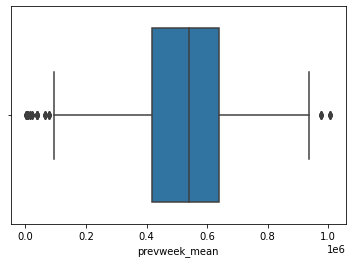

In [ ]:
sns.boxplot(df['prevweek_mean'])

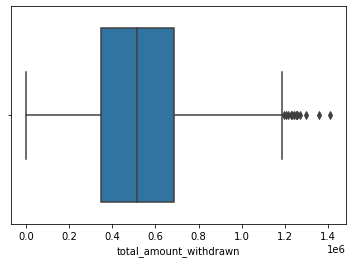

In [ ]:
sns.boxplot(df['total_amount_withdrawn'])

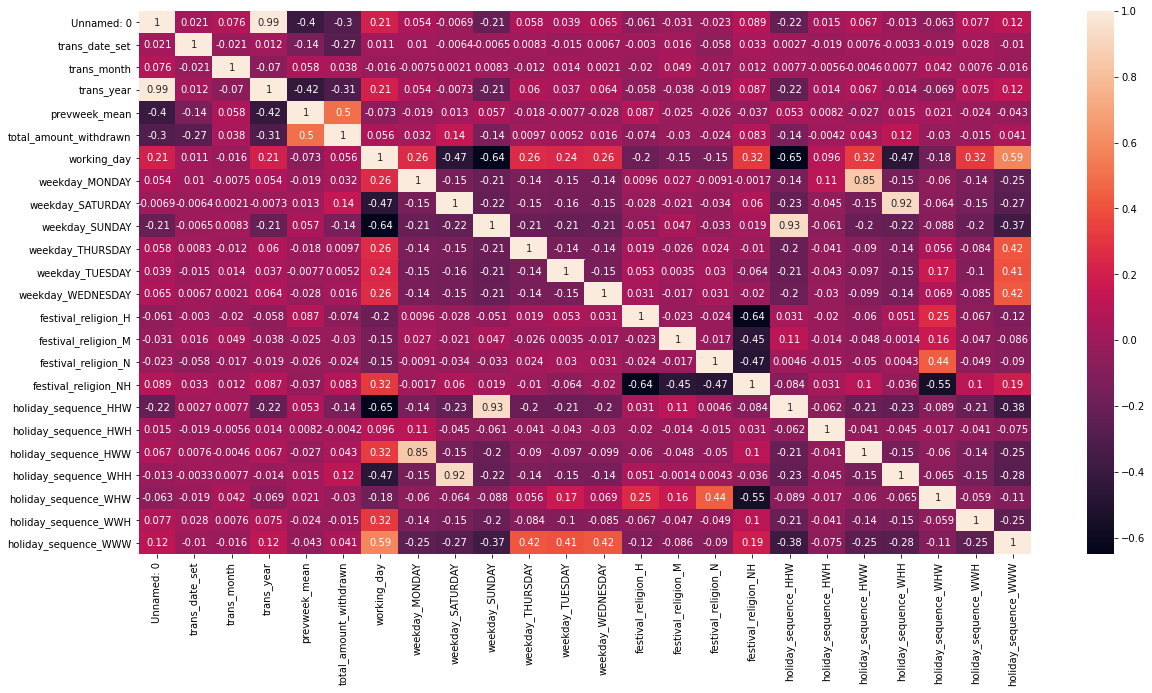

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_set', 'trans_month', 'trans_year',
       'prevweek_mean', 'total_amount_withdrawn', 'working_day',
       'weekday_MONDAY', 'weekday_SATURDAY', 'weekday_SUNDAY',
       'weekday_THURSDAY', 'weekday_TUESDAY', 'weekday_WEDNESDAY',
       'festival_religion_H', 'festival_religion_M', 'festival_religion_N',
       'festival_religion_NH', 'holiday_sequence_HHW', 'holiday_sequence_HWH',
       'holiday_sequence_HWW', 'holiday_sequence_WHH', 'holiday_sequence_WHW',
       'holiday_sequence_WWH', 'holiday_sequence_WWW'],
      dtype='object')

In [ ]:
X=df.drop(['total_amount_withdrawn'],axis=1)
y=df['total_amount_withdrawn']

In [ ]:
X.head()

,Unnamed: 0,trans_date_set,trans_month,trans_year,prevweek_mean,working_day,weekday_MONDAY,weekday_SATURDAY,weekday_SUNDAY,weekday_THURSDAY,weekday_TUESDAY,weekday_WEDNESDAY,festival_religion_H,festival_religion_M,festival_religion_N,festival_religion_NH,holiday_sequence_HHW,holiday_sequence_HWH,holiday_sequence_HWW,holiday_sequence_WHH,holiday_sequence_WHW,holiday_sequence_WWH,holiday_sequence_WWW
0,11,1,1,2011,648600,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,16,1,1,2011,648600,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,21,1,1,2011,648600,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,26,2,1,2011,648600,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,31,2,1,2011,648600,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
X.shape

(2244, 23)

*To Check Significance of each variable*

In [ ]:
import statsmodels.api as sm
reg_ols = sm.OLS(y,(sm.add_constant(X)))
reg_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared:                       0.397
Model:                                OLS   Adj. R-squared:                  0.390
Method:                     Least Squares   F-statistic:                     63.45
Date:                    Tue, 22 Sep 2020   Prob (F-statistic):          1.48e-223
Time:                            18:51:22   Log-Likelihood:                -30554.
No. Observations:                    2244   AIC:                         6.116e+04
Df Residuals:                        2220   BIC:                         6.129e+04
Df Model:                              23                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.014e+09   1.31e+08      7.708      0.000    7.56e+08    1.27e+09
Unnamed: 0             273.5326     37.270      7.339      0.000     200.445     346.620
trans_date_set       -3.856e+04   2621.943    -14.706      0.000   -4.37e+04   -3.34e+04
trans_month          -4.135e+04   5728.867     -7.217      0.000   -5.26e+04   -3.01e+04
trans_year           -5.038e+05   6.54e+04     -7.706      0.000   -6.32e+05   -3.76e+05
prevweek_mean            0.4709      0.027     17.660      0.000       0.419       0.523
working_day           6.305e+04   1.06e+05      0.595      0.552   -1.45e+05    2.71e+05
weekday_MONDAY        6.824e+04   3.56e+04      1.915      0.056   -1637.108    1.38e+05
weekday_SATURDAY      2.112e+05   4.74e+04      4.459      0.000    1.18e+05    3.04e+05
weekday_SUNDAY        2.099e+04   4.67e+04      0.450      0.653   -7.05e+04    1.12e+05
weekday_THURSDAY       5.63e+04   2.93e+04      1.918      0.055   -1253.013    1.14e+05
weekday_TUESDAY       5.023e+04   2.95e+04      1.700      0.089   -7700.939    1.08e+05
weekday_WEDNESDAY     6.413e+04   2.92e+04      2.196      0.028    6870.219    1.21e+05
festival_religion_H  -8.811e+04   5.18e+04     -1.700      0.089    -1.9e+05    1.35e+04
festival_religion_M   2.731e+04   5.68e+04      0.481      0.631   -8.41e+04    1.39e+05
festival_religion_N   2.764e+04   5.54e+04      0.499      0.618    -8.1e+04    1.36e+05
festival_religion_NH  1.795e+04    5.1e+04      0.352      0.725   -8.21e+04    1.18e+05
holiday_sequence_HHW   7.59e+04   3.72e+04      2.038      0.042    2869.977    1.49e+05
holiday_sequence_HWH  5.854e+04   1.11e+05      0.525      0.600    -1.6e+05    2.77e+05
holiday_sequence_HWW  9.977e+04   1.06e+05      0.941      0.347   -1.08e+05    3.08e+05
holiday_sequence_WHH  6.319e+04   3.67e+04      1.721      0.085   -8827.314    1.35e+05
holiday_sequence_WHW  6.725e+04   4.77e+04      1.410      0.159   -2.63e+04    1.61e+05
holiday_sequence_WWH  1.214e+05   1.06e+05      1.141      0.254   -8.72e+04     3.3e+05
holiday_sequence_WWW  9.325e+04   1.06e+05      0.883      0.377   -1.14e+05       3e+05
==============================================================================
Omnibus:                       81.226   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.204
Skew:                           0.353   Prob(JB):                     3.54e-26
Kurtosis:                       3.869   Cond. No.                     1.72e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+10. This might ind

In [ ]:
X.drop(['weekday_SUNDAY'],axis=1,inplace=True)

In [ ]:
reg_ols = sm.OLS(y,(sm.add_constant(X)))
reg_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared:                       0.397
Model:                                OLS   Adj. R-squared:                  0.391
Method:                     Least Squares   F-statistic:                     66.34
Date:                    Tue, 22 Sep 2020   Prob (F-statistic):          1.99e-224
Time:                            18:51:22   Log-Likelihood:                -30554.
No. Observations:                    2244   AIC:                         6.115e+04
Df Residuals:                        2221   BIC:                         6.129e+04
Df Model:                              22                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.014e+09   1.31e+08      7.711      0.000    7.56e+08    1.27e+09
Unnamed: 0             273.5871     37.263      7.342      0.000     200.513     346.661
trans_date_set       -3.859e+04   2620.509    -14.726      0.000   -4.37e+04   -3.35e+04
trans_month          -4.136e+04   5727.764     -7.221      0.000   -5.26e+04   -3.01e+04
trans_year            -5.04e+05   6.54e+04     -7.710      0.000   -6.32e+05   -3.76e+05
prevweek_mean            0.4709      0.027     17.664      0.000       0.419       0.523
working_day           5.321e+04   1.04e+05      0.514      0.608    -1.5e+05    2.56e+05
weekday_MONDAY        5.961e+04      3e+04      1.985      0.047     732.119    1.18e+05
weekday_SATURDAY      1.986e+05   3.82e+04      5.198      0.000    1.24e+05    2.74e+05
weekday_THURSDAY      5.082e+04   2.67e+04      1.904      0.057   -1532.693    1.03e+05
weekday_TUESDAY       4.463e+04   2.68e+04      1.666      0.096   -7900.557    9.72e+04
weekday_WEDNESDAY     5.857e+04   2.64e+04      2.214      0.027    6700.557     1.1e+05
festival_religion_H  -8.956e+04   5.17e+04     -1.732      0.083   -1.91e+05    1.19e+04
festival_religion_M   2.832e+04   5.67e+04      0.499      0.618    -8.3e+04     1.4e+05
festival_religion_N   2.651e+04   5.53e+04      0.479      0.632    -8.2e+04    1.35e+05
festival_religion_NH  2.427e+04    4.9e+04      0.495      0.621   -7.19e+04     1.2e+05
holiday_sequence_HHW   8.07e+04   3.57e+04      2.262      0.024    1.08e+04    1.51e+05
holiday_sequence_HWH  5.638e+04   1.11e+05      0.506      0.613   -1.62e+05    2.75e+05
holiday_sequence_HWW  1.019e+05   1.06e+05      0.962      0.336   -1.06e+05    3.09e+05
holiday_sequence_WHH  5.974e+04   3.59e+04      1.664      0.096   -1.07e+04     1.3e+05
holiday_sequence_WHW  6.387e+04   4.71e+04      1.356      0.175   -2.85e+04    1.56e+05
holiday_sequence_WWH   1.16e+05   1.06e+05      1.098      0.273   -9.12e+04    3.23e+05
holiday_sequence_WWW  9.258e+04   1.06e+05      0.877      0.381   -1.15e+05       3e+05
==============================================================================
Omnibus:                       80.928   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.503
Skew:                           0.353   Prob(JB):                     5.03e-26
Kurtosis:                       3.865   Cond. No.                     1.72e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X.drop(['working_day','festival_religion_N','festival_religion_M','festival_religion_NH','holiday_sequence_HWH'],axis=1,inplace=True)

In [ ]:
reg_ols = sm.OLS(y,(sm.add_constant(X)))
reg_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared:                       0.395
Model:                                OLS   Adj. R-squared:                  0.391
Method:                     Least Squares   F-statistic:                     85.57
Date:                    Tue, 22 Sep 2020   Prob (F-statistic):          4.16e-228
Time:                            18:51:22   Log-Likelihood:                -30557.
No. Observations:                    2244   AIC:                         6.115e+04
Df Residuals:                        2226   BIC:                         6.125e+04
Df Model:                              17                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.016e+09   1.31e+08      7.727      0.000    7.58e+08    1.27e+09
Unnamed: 0             274.0315     37.249      7.357      0.000     200.984     347.079
trans_date_set       -3.863e+04   2613.503    -14.781      0.000   -4.38e+04   -3.35e+04
trans_month          -4.138e+04   5725.840     -7.227      0.000   -5.26e+04   -3.02e+04
trans_year           -5.048e+05   6.53e+04     -7.725      0.000   -6.33e+05   -3.77e+05
prevweek_mean            0.4704      0.027     17.668      0.000       0.418       0.523
weekday_MONDAY        7.508e+04    2.8e+04      2.684      0.007    2.02e+04     1.3e+05
weekday_SATURDAY      1.761e+05   3.39e+04      5.200      0.000     1.1e+05    2.43e+05
weekday_THURSDAY      5.669e+04    2.6e+04      2.178      0.029    5652.363    1.08e+05
weekday_TUESDAY       5.071e+04   2.61e+04      1.943      0.052    -477.910    1.02e+05
weekday_WEDNESDAY     6.482e+04   2.58e+04      2.517      0.012    1.43e+04    1.15e+05
festival_religion_H  -1.293e+05   2.78e+04     -4.644      0.000   -1.84e+05   -7.47e+04
holiday_sequence_HHW  3.682e+04   2.71e+04      1.359      0.174   -1.63e+04       9e+04
holiday_sequence_HWW  9.709e+04    3.4e+04      2.860      0.004    3.05e+04    1.64e+05
holiday_sequence_WHH  3.767e+04   3.38e+04      1.114      0.265   -2.86e+04    1.04e+05
holiday_sequence_WHW  1.774e+04   4.09e+04      0.434      0.664   -6.24e+04    9.78e+04
holiday_sequence_WWH  1.247e+05   2.85e+04      4.376      0.000    6.88e+04    1.81e+05
holiday_sequence_WWW  9.615e+04   3.32e+04      2.897      0.004    3.11e+04    1.61e+05
==============================================================================
Omnibus:                       80.791   Durbin-Watson:                   1.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.144
Skew:                           0.353   Prob(JB):                     6.02e-26
Kurtosis:                       3.863   Cond. No.                     1.72e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X.drop(['holiday_sequence_WHW','holiday_sequence_WHH','holiday_sequence_HHW'],axis=1,inplace=True)

In [ ]:
reg_ols = sm.OLS(y,(sm.add_constant(X)))
reg_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared:                       0.395
Model:                                OLS   Adj. R-squared:                  0.391
Method:                     Least Squares   F-statistic:                     103.8
Date:                    Tue, 22 Sep 2020   Prob (F-statistic):          1.35e-230
Time:                            18:51:22   Log-Likelihood:                -30558.
No. Observations:                    2244   AIC:                         6.115e+04
Df Residuals:                        2229   BIC:                         6.123e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.01e+09   1.31e+08      7.688      0.000    7.52e+08    1.27e+09
Unnamed: 0             272.2359     37.224      7.314      0.000     199.239     345.232
trans_date_set       -3.848e+04   2610.623    -14.740      0.000   -4.36e+04   -3.34e+04
trans_month          -4.106e+04   5720.503     -7.178      0.000   -5.23e+04   -2.98e+04
trans_year           -5.019e+05   6.53e+04     -7.686      0.000    -6.3e+05   -3.74e+05
prevweek_mean            0.4695      0.027     17.643      0.000       0.417       0.522
weekday_MONDAY        6.546e+04   2.68e+04      2.442      0.015    1.29e+04    1.18e+05
weekday_SATURDAY      1.777e+05    1.4e+04     12.676      0.000     1.5e+05    2.05e+05
weekday_THURSDAY      4.898e+04   2.22e+04      2.210      0.027    5527.412    9.24e+04
weekday_TUESDAY       4.245e+04   2.16e+04      1.967      0.049     125.759    8.48e+04
weekday_WEDNESDAY     5.707e+04   2.19e+04      2.611      0.009    1.42e+04    9.99e+04
festival_religion_H  -1.316e+05   2.72e+04     -4.835      0.000   -1.85e+05   -7.83e+04
holiday_sequence_HWW  7.274e+04   2.67e+04      2.724      0.007    2.04e+04    1.25e+05
holiday_sequence_WWH  9.209e+04   1.48e+04      6.239      0.000    6.31e+04    1.21e+05
holiday_sequence_WWW  7.029e+04   2.07e+04      3.402      0.001    2.98e+04    1.11e+05
==============================================================================
Omnibus:                       81.915   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.337
Skew:                           0.355   Prob(JB):                     2.01e-26
Kurtosis:                       3.873   Cond. No.                     1.72e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#import statsmodels.formula.api as smf

In [ ]:
#model = smf.ols(formula='total_amount_withdrawn ~ trans_date_set:trans_month:trans_year + prevweek_mean + weekday_MONDAY + weekday_SATURDAY +  weekday_THURSDAY + weekday_TUESDAY + weekday_WEDNESDAY + festival_religion_H + holiday_sequence_HWW + holiday_sequence_WWH + holiday_sequence_WWW'
#                      , data=df).fit()
#model.summary()

In [ ]:
X=np.array(X)
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(2244, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()


In [ ]:
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_mlr = mlr.predict(X_test)

In [ ]:
rmse_mlr = sqrt(mean_squared_error(y_test,y_mlr))
print("R sqr:",r2_score(y_test,y_mlr))
print("Mean Squared error:",mean_squared_error(y_test,y_mlr))
print("Mean Absolute error:",mean_absolute_error(y_test,y_mlr))
print("Root Mean Squared error:",rmse_mlr)

R sqr: 0.42024829011738407
Mean Squared error: 0.5376744644250443
Mean Absolute error: 0.5713279230171312
Root Mean Squared error: 0.7332628890275603


In [ ]:
y_mlr=np.array(y_mlr)
y_test=np.array(y_test)

In [ ]:
for i in range(len(y_test)):
    print("Y=%s, Predicted=%s" % (y_test[i], y_mlr[i]))

Y=[0.0375658], Predicted=[0.20862427]
Y=[1.59820373], Predicted=[0.67297885]
Y=[1.01802646], Predicted=[0.64335304]
Y=[-0.66020445], Predicted=[-0.25244927]
Y=[-0.22565556], Predicted=[0.41024297]
Y=[-1.79057668], Predicted=[-0.76505189]
Y=[0.71197321], Predicted=[0.60222282]
Y=[-0.81206293], Predicted=[0.04738687]
Y=[0.09986672], Predicted=[0.37301456]
Y=[-0.8389302], Predicted=[-0.7700481]
Y=[-0.05588557], Predicted=[1.2324782]
Y=[-1.32059415], Predicted=[-0.97230881]
Y=[0.47445097], Predicted=[0.04596806]
Y=[-0.90123111], Predicted=[-1.09235283]
Y=[0.69717674], Predicted=[1.08457512]
Y=[0.68783161], Predicted=[0.81586899]
Y=[-0.16257589], Predicted=[-0.03359921]
Y=[0.30039779], Predicted=[-0.31503901]
Y=[0.61774308], Predicted=[0.40010061]
Y=[-0.46590347], Predicted=[0.13301342]
Y=[-1.04724888], Predicted=[-0.61913676]
Y=[-1.19054099], Predicted=[-1.70257065]
Y=[-1.45025793], Predicted=[-1.16635795]
Y=[0.54025631], Predicted=[-0.20296975]
Y=[0.33349515], Predicted=[0.86874761]
Y=[-1

In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train,y_train)

[18:51:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_xg=xg.predict(X_test)
y_xg=np.array(y_xg)

In [ ]:
rmse_xg = sqrt(mean_squared_error(y_test,y_xg))
print("R sqr:",r2_score(y_test,y_xg))
print("Mean Squared error:",mean_squared_error(y_test,y_xg))
print("Mean Absolute error:",mean_absolute_error(y_test,y_xg))
print("Root Mean Squared error:",rmse_xg)

R sqr: 0.5336047110968138
Mean Squared error: 0.43254523082330937
Mean Absolute error: 0.5030525814088339
Root Mean Squared error: 0.6576817093574288


In [ ]:
for i in range(len(y_test)):
    print("Y=%s, Predicted=%s" % (y_test[i], y_xg[i]))

Y=[0.0375658], Predicted=-0.26247233
Y=[1.59820373], Predicted=1.1703131
Y=[1.01802646], Predicted=0.31113896
Y=[-0.66020445], Predicted=-0.151707
Y=[-0.22565556], Predicted=-0.066096365
Y=[-1.79057668], Predicted=-1.268076
Y=[0.71197321], Predicted=0.8003706
Y=[-0.81206293], Predicted=0.019501656
Y=[0.09986672], Predicted=0.165254
Y=[-0.8389302], Predicted=-0.93368304
Y=[-0.05588557], Predicted=0.18201426
Y=[-1.32059415], Predicted=-1.3950049
Y=[0.47445097], Predicted=0.3334441
Y=[-0.90123111], Predicted=-1.0452387
Y=[0.69717674], Predicted=0.57306176
Y=[0.68783161], Predicted=0.5040035
Y=[-0.16257589], Predicted=0.38675746
Y=[0.30039779], Predicted=-0.28262293
Y=[0.61774308], Predicted=-0.34152728
Y=[-0.46590347], Predicted=-0.039493322
Y=[-1.04724888], Predicted=-0.25781304
Y=[-1.19054099], Predicted=-1.3418267
Y=[-1.45025793], Predicted=-0.99173427
Y=[0.54025631], Predicted=0.20652694
Y=[0.33349515], Predicted=0.7708973
Y=[-1.24816933], Predicted=-1.2148032
Y=[-0.53054067], Predict

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100, max_depth=10)
rfr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_rfr=rfr.predict(X_test)
y_rfr=np.array(y_rfr)

In [ ]:
rmse_rfr = sqrt(mean_squared_error(y_test,y_rfr))
print("R sqr:",r2_score(y_test,y_rfr))
print("Mean Squared error:",mean_squared_error(y_test,y_rfr))
print("Mean Absolute error:",mean_absolute_error(y_test,y_rfr))
print("Root Mean Squared error:",rmse_rfr)

R sqr: 0.5116780935719146
Mean Squared error: 0.4528804573235296
Mean Absolute error: 0.5208188843353859
Root Mean Squared error: 0.6729639346380529


In [ ]:
for i in range(len(y_test)):
    print("Y=%s, Predicted=%s" % (y_test[i], y_rfr[i]))

Y=[0.0375658], Predicted=-0.19016911489343247
Y=[1.59820373], Predicted=1.3633121191872046
Y=[1.01802646], Predicted=0.4326394712876452
Y=[-0.66020445], Predicted=-0.28664002313971987
Y=[-0.22565556], Predicted=-0.11673027345972985
Y=[-1.79057668], Predicted=-1.5540002767144596
Y=[0.71197321], Predicted=1.1452435860532932
Y=[-0.81206293], Predicted=-0.0619546223548776
Y=[0.09986672], Predicted=0.08164909034766545
Y=[-0.8389302], Predicted=-0.5979988467099789
Y=[-0.05588557], Predicted=-0.1383069070347677
Y=[-1.32059415], Predicted=-1.5769988331801161
Y=[0.47445097], Predicted=0.15278488146709218
Y=[-0.90123111], Predicted=-1.1968795547585578
Y=[0.69717674], Predicted=0.20162378532451966
Y=[0.68783161], Predicted=0.08214939509909434
Y=[-0.16257589], Predicted=0.3626507622162285
Y=[0.30039779], Predicted=-0.38892731332521924
Y=[0.61774308], Predicted=-0.16175160178201867
Y=[-0.46590347], Predicted=0.08608844063775348
Y=[-1.04724888], Predicted=-0.561045634710186
Y=[-1.19054099], Predicte

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
np.random.seed(5)

In [ ]:
ann=keras.Sequential()

In [ ]:
ann.add(Dense(units=15,activation='relu'))

ann.add(Dense(units=10,activation='relu'))

ann.add(Dense(units=10,activation='relu'))

ann.add(Dense(units=8,activation='relu'))

ann.add(Dense(units=8,activation='relu'))

ann.add(Dense(units=5,activation='relu'))

ann.add(Dense(units=5,activation='relu'))

ann.add(Dense(units=1,activation='linear'))

In [ ]:
ann.compile(loss='mse',optimizer='adam')

In [ ]:
epoch_hist = ann.fit(X_train,y_train,epochs=100,batch_size=20)

Epoch 1/100
90/90 [==============================] - 0s 1ms/step - loss: 0.9622
Epoch 2/100
90/90 [==============================] - 0s 1ms/step - loss: 0.8620
Epoch 3/100
90/90 [==============================] - 0s 1ms/step - loss: 0.7885
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.7358
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6922
Epoch 6/100
90/90 [==============================] - 0s 1ms/step - loss: 0.6588
Epoch 7/100
90/90 [==============================] - 0s 1ms/step - loss: 0.6145
Epoch 8/100
90/90 [==============================] - 0s 1ms/step - loss: 0.5696
Epoch 9/100
90/90 [==============================] - 0s 1ms/step - loss: 0.5433
Epoch 10/100
90/90 [==============================] - 0s 1ms/step - loss: 0.5239
Epoch 11/100
90/90 [==============================] - 0s 1ms/step - loss: 0.5058
Epoch 12/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4935
Epoch 13/100
90/90 [=================

In [ ]:
y_ann = ann.predict(X_test)

In [ ]:
for i in range(len(y_test)):
    print("Y=%s, Predicted=%s" % (y_test[i], y_ann[i]))

Y=[0.0375658], Predicted=[0.01122707]
Y=[1.59820373], Predicted=[1.404877]
Y=[1.01802646], Predicted=[0.7296806]
Y=[-0.66020445], Predicted=[-0.4362297]
Y=[-0.22565556], Predicted=[-0.3345956]
Y=[-1.79057668], Predicted=[-1.105473]
Y=[0.71197321], Predicted=[0.81866914]
Y=[-0.81206293], Predicted=[-0.06307214]
Y=[0.09986672], Predicted=[0.11041027]
Y=[-0.8389302], Predicted=[-1.105473]
Y=[-0.05588557], Predicted=[0.66291827]
Y=[-1.32059415], Predicted=[-1.105473]
Y=[0.47445097], Predicted=[-0.13566756]
Y=[-0.90123111], Predicted=[-1.105473]
Y=[0.69717674], Predicted=[0.64545804]
Y=[0.68783161], Predicted=[0.6781668]
Y=[-0.16257589], Predicted=[0.11423522]
Y=[0.30039779], Predicted=[-0.42815387]
Y=[0.61774308], Predicted=[-0.15731096]
Y=[-0.46590347], Predicted=[0.11658233]
Y=[-1.04724888], Predicted=[-1.105473]
Y=[-1.19054099], Predicted=[-1.105473]
Y=[-1.45025793], Predicted=[-1.105473]
Y=[0.54025631], Predicted=[0.25768292]
Y=[0.33349515], Predicted=[1.065383]
Y=[-1.24816933], Predic

In [ ]:
rmse_ann = sqrt(mean_squared_error(y_test,y_ann))
print("R sqr:",r2_score(y_test,y_ann))
print("Mean Squared error:",mean_squared_error(y_test,y_ann))
print("Mean Absolute error:",mean_absolute_error(y_test,y_ann))
print("Root Mean Squared error:",rmse_ann)

R sqr: 0.4813508002276309
Mean Squared error: 0.4810066550188336
Mean Absolute error: 0.5323779770937098
Root Mean Squared error: 0.6935464332103753


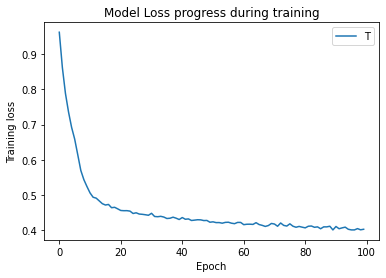

In [ ]:
plt.plot(epoch_hist.history['loss'])
plt.title('Model Loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend('Training loss')

In [ ]:
Results = {
    'Model':['Multiple Linear Regression','XGBoost Regressor','Random Forest Regressor','Artificial Neural Network'],
   'R squared':[0.42024,0.53360,0.51167,0.48135],
   'Mean Square Error':[0.53767,0.43254,0.45288,0.48100],
   'Mean Absolute Error':[0.57132,0.50305,0.52081,0.53237],
   'Root Mean Square Error':[0.73326,0.65768,0.67296,0.69354]}

Final = pd.DataFrame(Results)

In [ ]:
Final

,Model,R squared,Mean Square Error,Mean Absolute Error,Root Mean Square Error
0,Multiple Linear Regression,0.42024,0.53767,0.57132,0.73326
1,XGBoost Regressor,0.53360,0.43254,0.50305,0.65768
2,Random Forest Regressor,0.51167,0.45288,0.52081,0.67296
3,Artificial Neural Network,0.48135,0.48100,0.53237,0.69354
